In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
%pylab inline
import matplotlib.pyplot as plt
import math

Populating the interactive namespace from numpy and matplotlib


In [88]:
df = pd.read_excel('C:/Users/eli/Desktop/cardio_vascular_desease.xlsx')

About Dataset
Data description

There are 3 types of input features:

    Objective: factual information;
    Examination: results of medical examination;
    Subjective: information given by the patient.

Features:

    Age | Objective Feature | age | int (days)
    Height | Objective Feature | height | int (cm) |
    Weight | Objective Feature | weight | float (kg) |
    Gender | Objective Feature | gender | categorical code |
    Systolic blood pressure | Examination Feature | ap_hi | int |
    Diastolic blood pressure | Examination Feature | ap_lo | int |
    Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal 
    Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
    Smoking | Subjective Feature | smoke | binary |
    Alcohol intake | Subjective Feature | alco | binary |
    Physical activity | Subjective Feature | active | binary |
    Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination. 

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


Handling Missing Values in Data

In [7]:
df.isna().sum() / len(df)

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
ap_hi          0.0
ap_lo          0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

No missing values


Convert Age(in days) in Age(in years)

In [8]:
df['age']

0        18393
1        20228
2        18857
3        17623
4        17474
         ...  
69995    19240
69996    22601
69997    19066
69998    22431
69999    20540
Name: age, Length: 70000, dtype: int64

In [9]:
df['age'] = df['age'] / 365

In [10]:
df['age'].head()

0    50.391781
1    55.419178
2    51.663014
3    48.282192
4    47.873973
Name: age, dtype: float64

In [11]:
df['age'] = df['age'].apply(np.int64)
df['age'].head()

0    50
1    55
2    51
3    48
4    47
Name: age, dtype: int64


What does the distribution of ages look like?

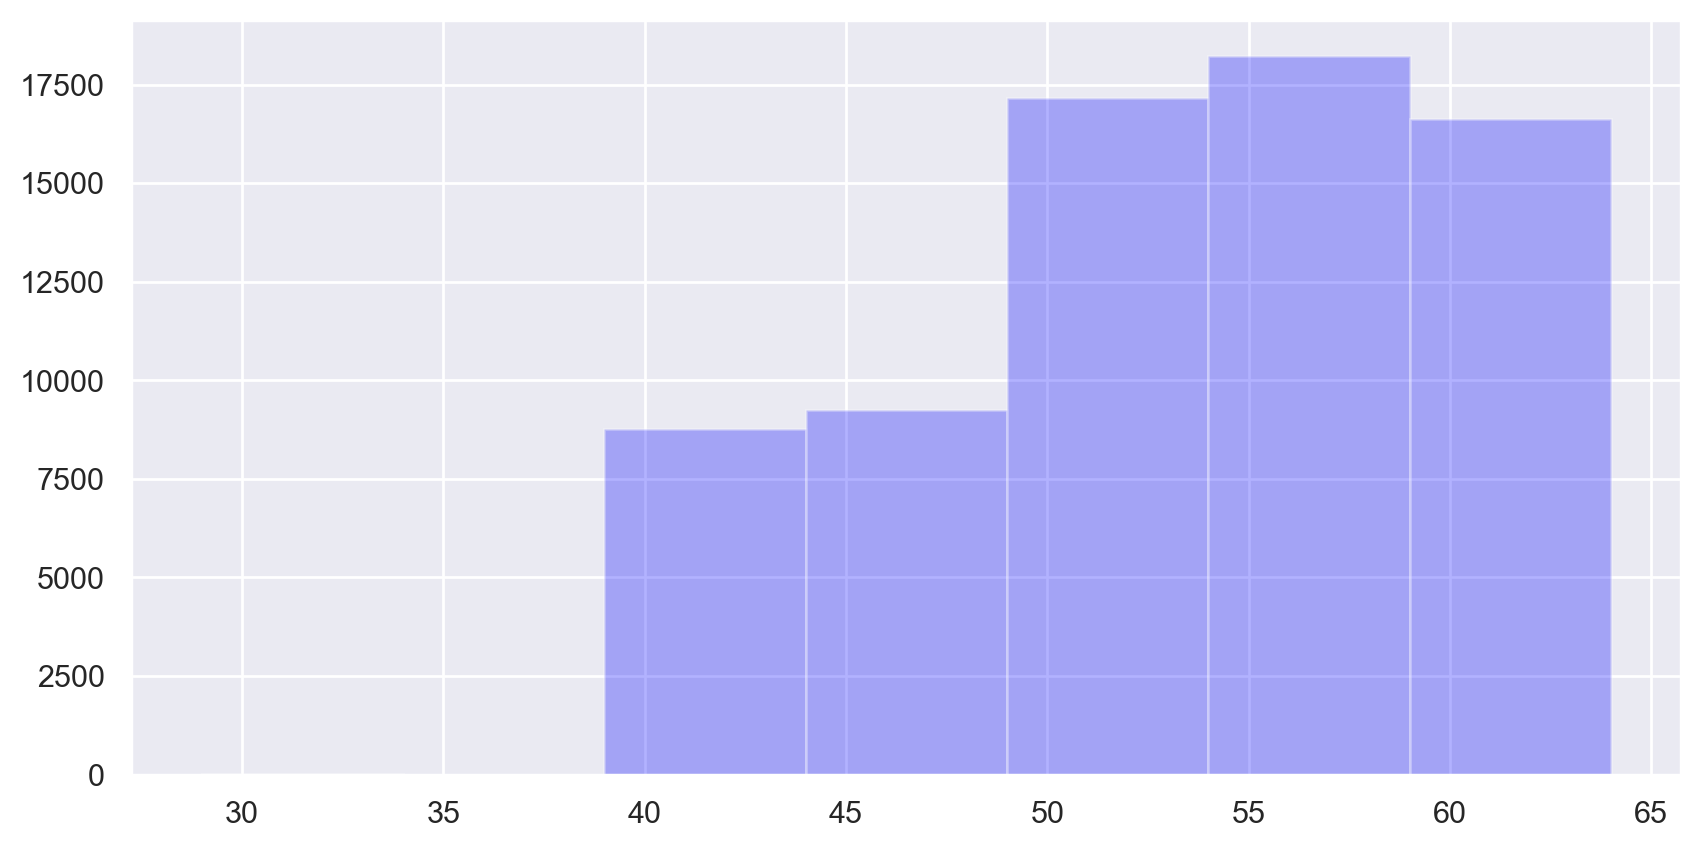

In [12]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5), dpi = 200)
plt.hist(
   df['age'],
   alpha = 0.3,
   color = 'blue',
   bins = 7
)
plt.show()

In [13]:
df['age'].value_counts()

55    3927
53    3868
57    3686
56    3607
54    3605
59    3576
49    3417
58    3409
51    3368
52    3279
50    3216
60    3200
63    2736
61    2728
62    2199
47    2197
64    2187
45    2087
43    2031
41    1903
48    1811
39    1780
46    1625
40    1622
44    1514
42    1418
29       3
30       1
Name: age, dtype: int64

In [14]:
min_age = df['age'].min()
min_age

29

In [23]:
max_age =  df['age'].max()
max_age

64

In [26]:
avg_age = round(df['age'].mean(),2)
avg_age

52.84

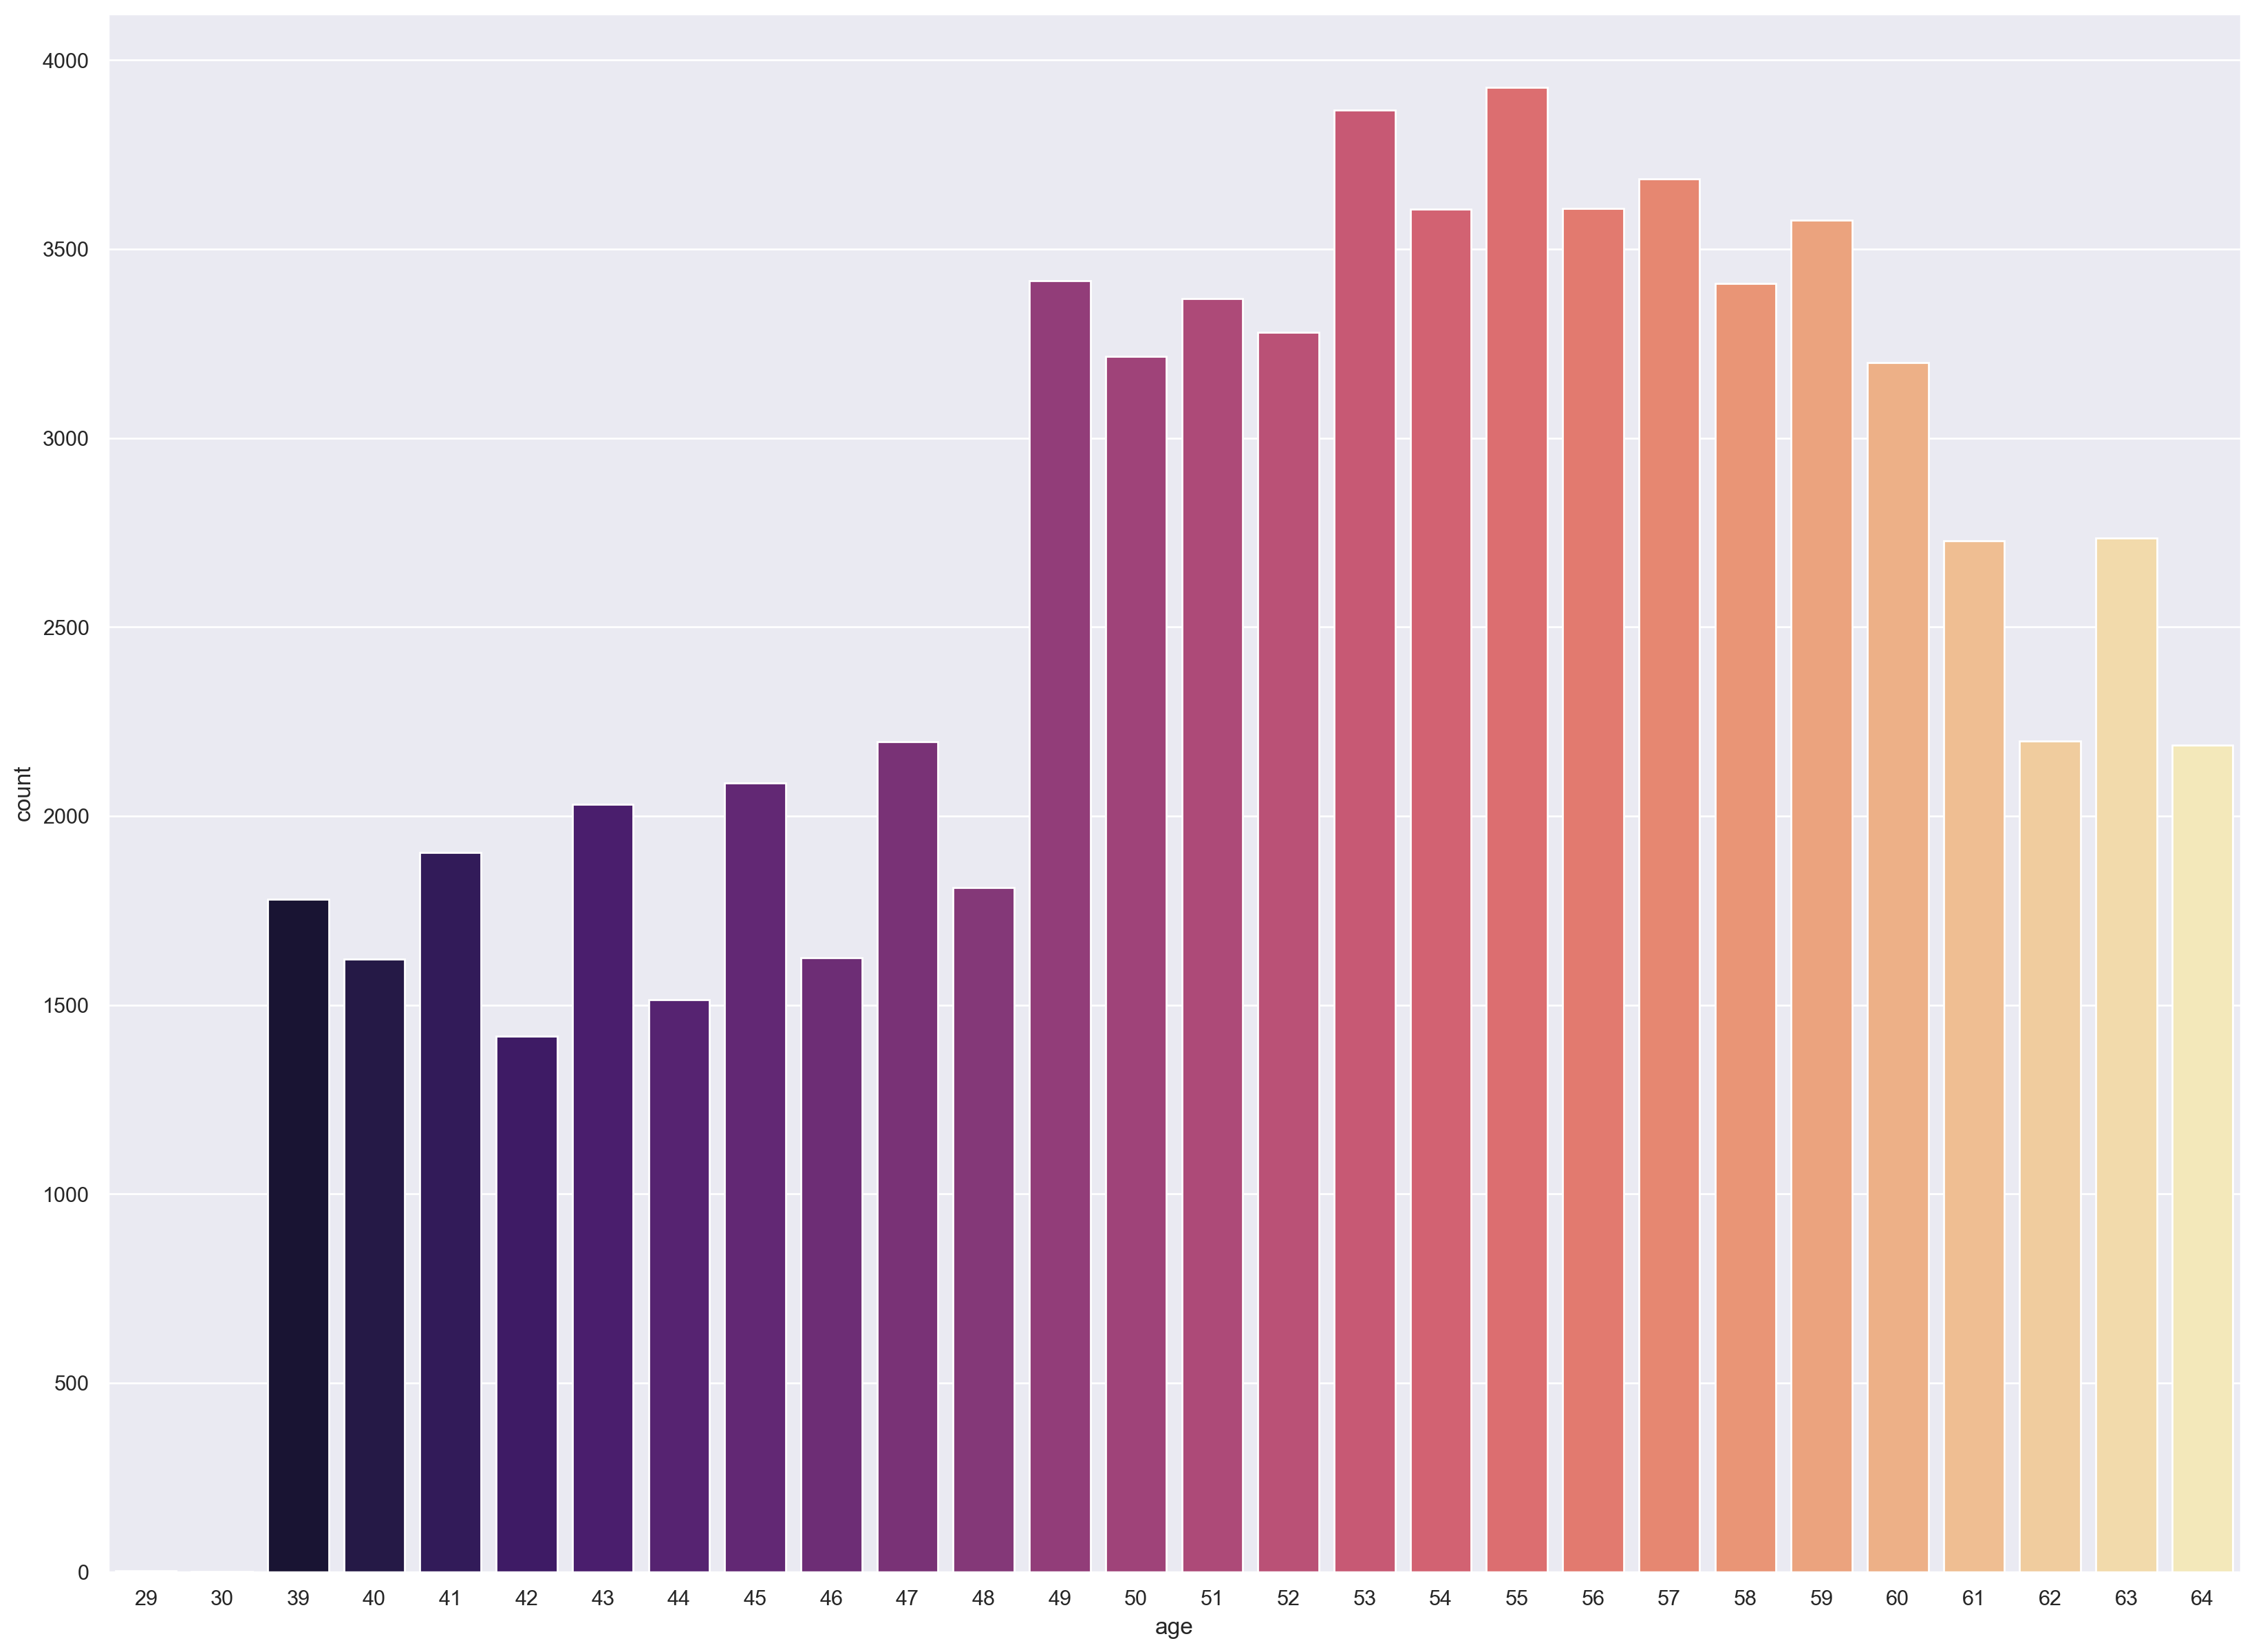

In [15]:
df.sort_values(by=['age'])
plt.figure(figsize=(20,15), dpi = 200)
sns.countplot(data = df.sort_values(by=['age']), x = 'age', palette = 'magma' )
plt.show()

Create a histogram of the ages grouped by cholesterol levels.
The plots show that the most people from all ages are with normal cholesterol level.

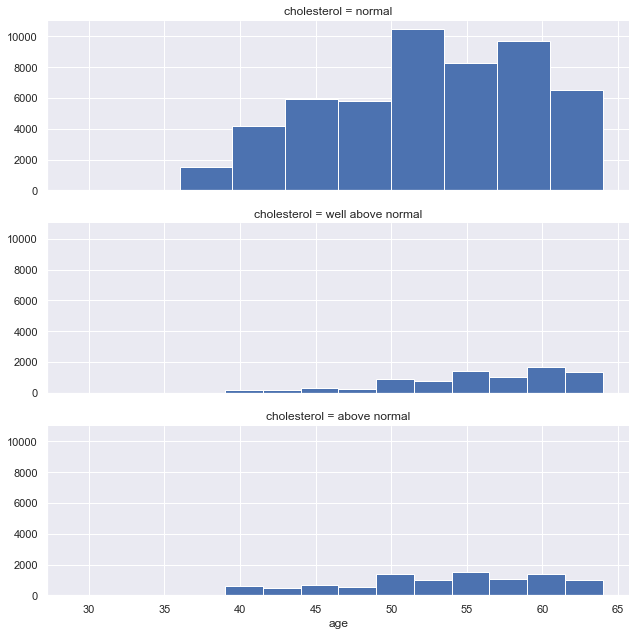

In [16]:
df['cholesterol'] = df['cholesterol'].replace({1: 'normal', 2: 'above normal',
                                                                 3: 'well above normal'})
df_age_chol = df[['age', 'cholesterol']]
g = sns.FacetGrid(df_age_chol, row = 'cholesterol', height = 3, aspect = 3)
g = g.map(plt.hist, 'age')
plt.show()

In [17]:
df['cholesterol'].value_counts() / len(df)

normal               0.748357
above normal         0.136414
well above normal    0.115229
Name: cholesterol, dtype: float64

Plot the relationship between ages and cholesterol levels.

Text(67.16217983183134, 3.317887673406039, 'pearsonr = 0.15; p = 0.0')

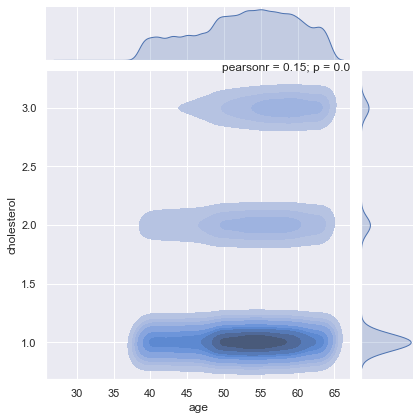

In [18]:
df['cholesterol'] = df['cholesterol'].replace({'normal': 1, 'above normal': 2,
                                                                 'well above normal': 3})
jg = sns.jointplot(x='age', y='cholesterol', data=df, kind='kde', fill=True)
 
da_no_nulls = df[['age', 'cholesterol']].dropna()
pearsonr, p = stats.pearsonr(da_no_nulls.age, da_no_nulls.cholesterol)
pearson_str = f'pearsonr = {pearsonr:.2f}; p = {p}'
jg.ax_joint.text(
    jg.ax_joint._axes.xaxis.get_data_interval()[1], 
    jg.ax_joint._axes.yaxis.get_data_interval()[1], 
    pearson_str, 
    horizontalalignment='right')

Create a histogram of the ages grouped by glucose levels.
The plots show that the most people from all ages are with normal glucose level.

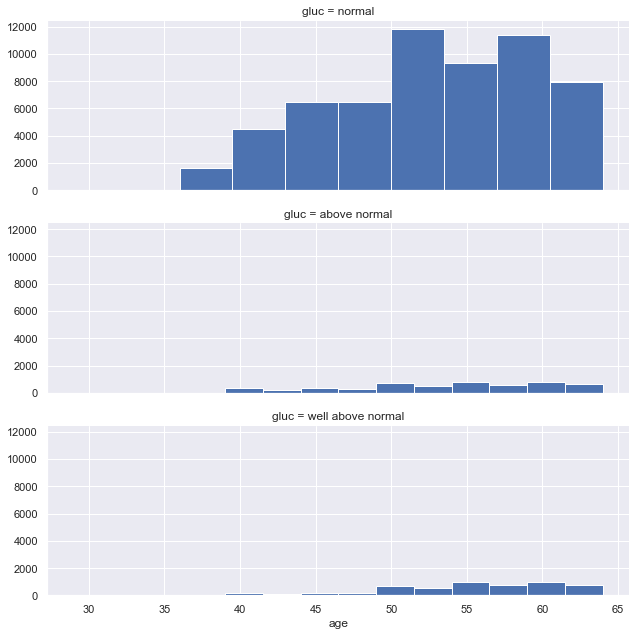

In [19]:
df['gluc'] = df['gluc'].replace({1: "normal", 2: "above normal", 3: "well above normal"})
df_age_gluc = df[['age', 'gluc']]
g = sns.FacetGrid(df_age_gluc, row = 'gluc', height = 3, aspect = 3)
g = g.map(plt.hist, 'age')
plt.show()

In [20]:
df['gluc'].value_counts() / len(df)

normal               0.849700
well above normal    0.076157
above normal         0.074143
Name: gluc, dtype: float64

Plot the relationship between ages and glucose levels.

Text(67.16217983183132, 3.267427524498932, 'pearsonr = 0.10; p = 4.2717053817762035e-150')

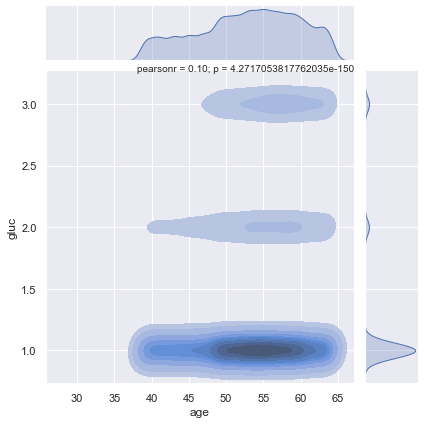

In [45]:
df['gluc'] = df['gluc'].replace({'normal': 1, 'above normal': 2,
                                                                 'well above normal': 3})
jg = sns.jointplot(x='age', y='gluc', data=df, kind='kde', fill=True)
da_no_nulls = df[['age', 'gluc']].dropna()
pearsonr, p = stats.pearsonr(da_no_nulls.age, da_no_nulls.gluc)
pearson_str = f'pearsonr = {pearsonr:.2f}; p = {p}'
jg.ax_joint.text(
    jg.ax_joint._axes.xaxis.get_data_interval()[1], 
    jg.ax_joint._axes.yaxis.get_data_interval()[1], 
    pearson_str, 
    horizontalalignment='right')

Find the correlation between the systolic and the diastolic blood pressure measurement.
Inspect the columns for unrealistic values.

In [194]:
df['ap_lo'].max()

130

Replace unrealistic values with some realistic in df['ap_lo'] (diastolic blood measurement) and in df['ap_hi'] (systolic blood measurement).

In [99]:
df['ap_lo'] = df['ap_lo'].replace(1100, 110)
df['ap_lo'] = df['ap_lo'].replace(16020, 160)
df['ap_lo'] = df['ap_lo'].replace(14020, 140)
df['ap_lo'] = df['ap_lo'].replace(800, 80)
df['ap_lo'] = abs(df['ap_lo'])

In [193]:
df['ap_lo'].min()

30

In [192]:
df['ap_hi'].max()

240

In [189]:
df['ap_hi'] = df['ap_hi'].replace(16020, 160)
df['ap_hi'] = df['ap_hi'].replace(14020, 140)
df['ap_hi'] = df['ap_hi'].replace(13010, 130)
df['ap_hi'] = df['ap_hi'].replace(11500, 115)
df['ap_hi'] = df['ap_hi'].replace(11020, 120)
df['ap_hi'] = df['ap_hi'].replace(2000, 200)
df['ap_hi'] = df['ap_hi'].replace(1620, 160)
df['ap_hi'] = df['ap_hi'].replace(1520, 150)
df['ap_hi'] = df['ap_hi'].replace(1500, 150)
df['ap_hi'] = df['ap_hi'].replace(1420, 140)
df['ap_hi'] = df['ap_hi'].replace(1400, 140)
df['ap_hi'] = df['ap_hi'].replace(1110, 110)
df['ap_hi'] = df['ap_hi'].replace(960, 96)
df['ap_hi'] = abs(df['ap_hi'])

In [191]:
df['ap_hi'].min()

70

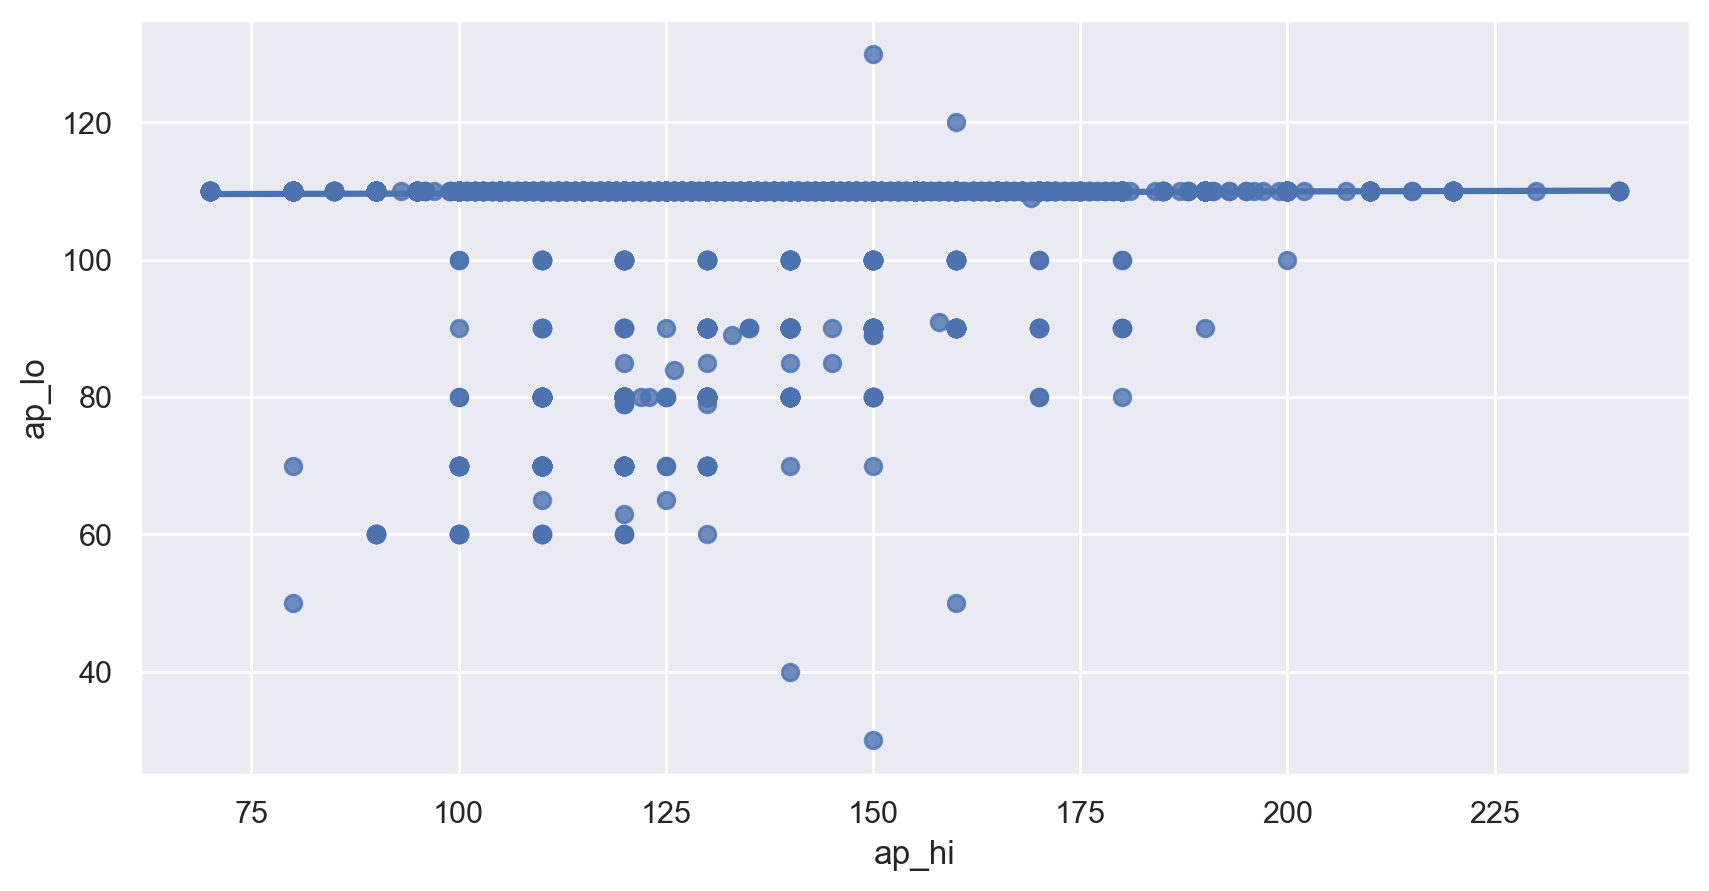

In [203]:
plt.figure(figsize=(10,5), dpi = 200)
sns.regplot(x = 'ap_hi', y = 'ap_lo', data = df)
plt.show()

In [ ]:
What are the top five most comman values in systolic and diastolic blood measurement?

In [210]:
df['ap_hi'].value_counts()[:5].sort_values(ascending=False)

120    27704
140     9519
130     8964
110     8645
150     4452
Name: ap_hi, dtype: int64

In [211]:
df['ap_lo'].value_counts()[:5].sort_values(ascending=False)

110    69327
80       311
90       144
70       100
100       75
Name: ap_lo, dtype: int64

In [209]:
df['ap_hi'].corr(df['ap_lo'])

0.0174030605481379

Construct a grid of scatterplots between the systolic and the diastolic blood pressure measurement.
Stratify the plots by smoking (rows) and by alcohol intake groups (columns).
The plots show that the most people who do not smoke or drink have lower blood pressures.


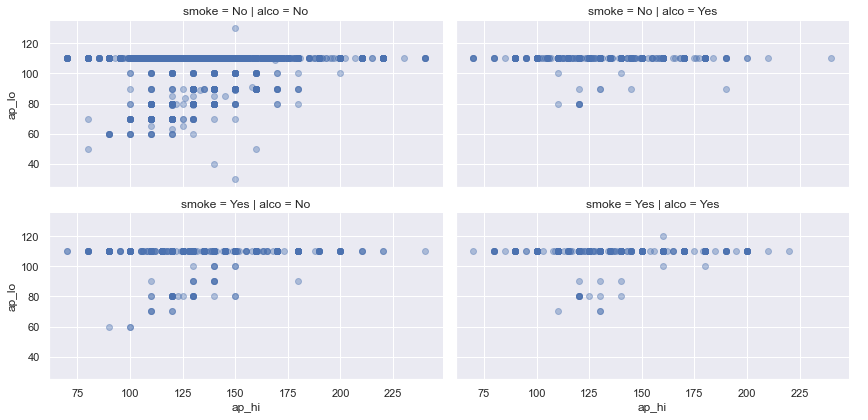

In [216]:
df['smoke'] = df.smoke.replace({0: 'No', 1: 'Yes'})
df['alco'] = df.alco.replace({0: 'No', 1: 'Yes'})
sns.FacetGrid(df, row='smoke',  col='alco', height = 3, aspect = 2).map(
    plt.scatter, 'ap_hi', 'ap_lo', alpha=0.4).add_legend()

Construct a grid of scatterplots between the systolic and the diastolic blood pressure measurement.
Stratify the plots by cholesterol levels (row) and by glucose levels (columns).
The plots show that the most people with "cholesterol level = normal" and with "glucose level = normal" have lower blood pressures.


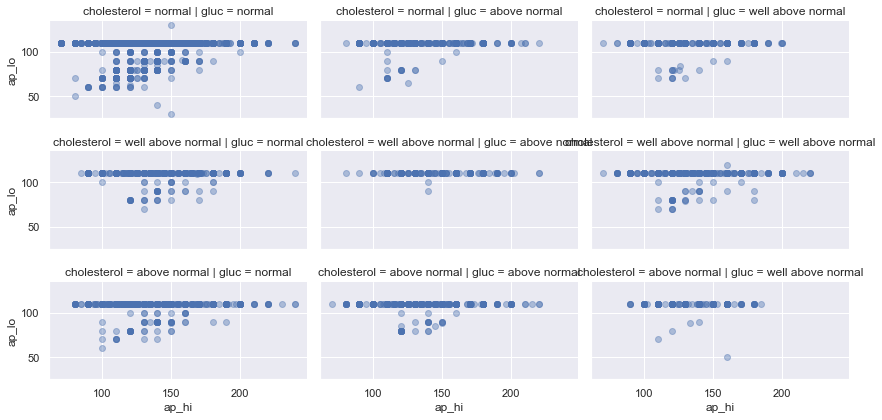

In [228]:
df['cholesterol'] = df['cholesterol'].replace({1: 'normal', 2: 'above normal',
                                                                           3: 'well above normal'})
df['gluc'] = df['gluc'].replace({1: 'normal', 2: 'above normal',
                                                            3: 'well above normal'})
sns.FacetGrid(df, row='cholesterol',  col='gluc', height = 2, aspect = 2).map(
    plt.scatter, 'ap_hi', 'ap_lo', alpha=0.4).add_legend()

Construct a grid of scatterplots between the systolic and the diastolic blood pressure measurement.
Stratify the plots by gender (row) and by physical activity (columns).
The plots show that the most people with some physical activity have lower blood pressures.

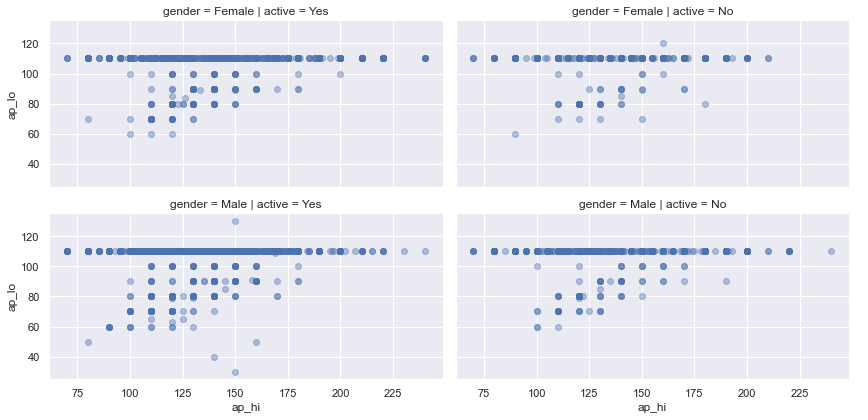

In [240]:
df['gender'] = df['gender'].replace({1: 'Male', 2: 'Female'})
df['active'] = df['active'].replace({0: 'No', 1: 'Yes'})
sns.FacetGrid(df, row='gender',  col='active', height = 3, aspect = 2).map(
    plt.scatter, 'ap_hi', 'ap_lo', alpha=0.4).add_legend()

In [ ]:
The plot shows that the most people are physical active.

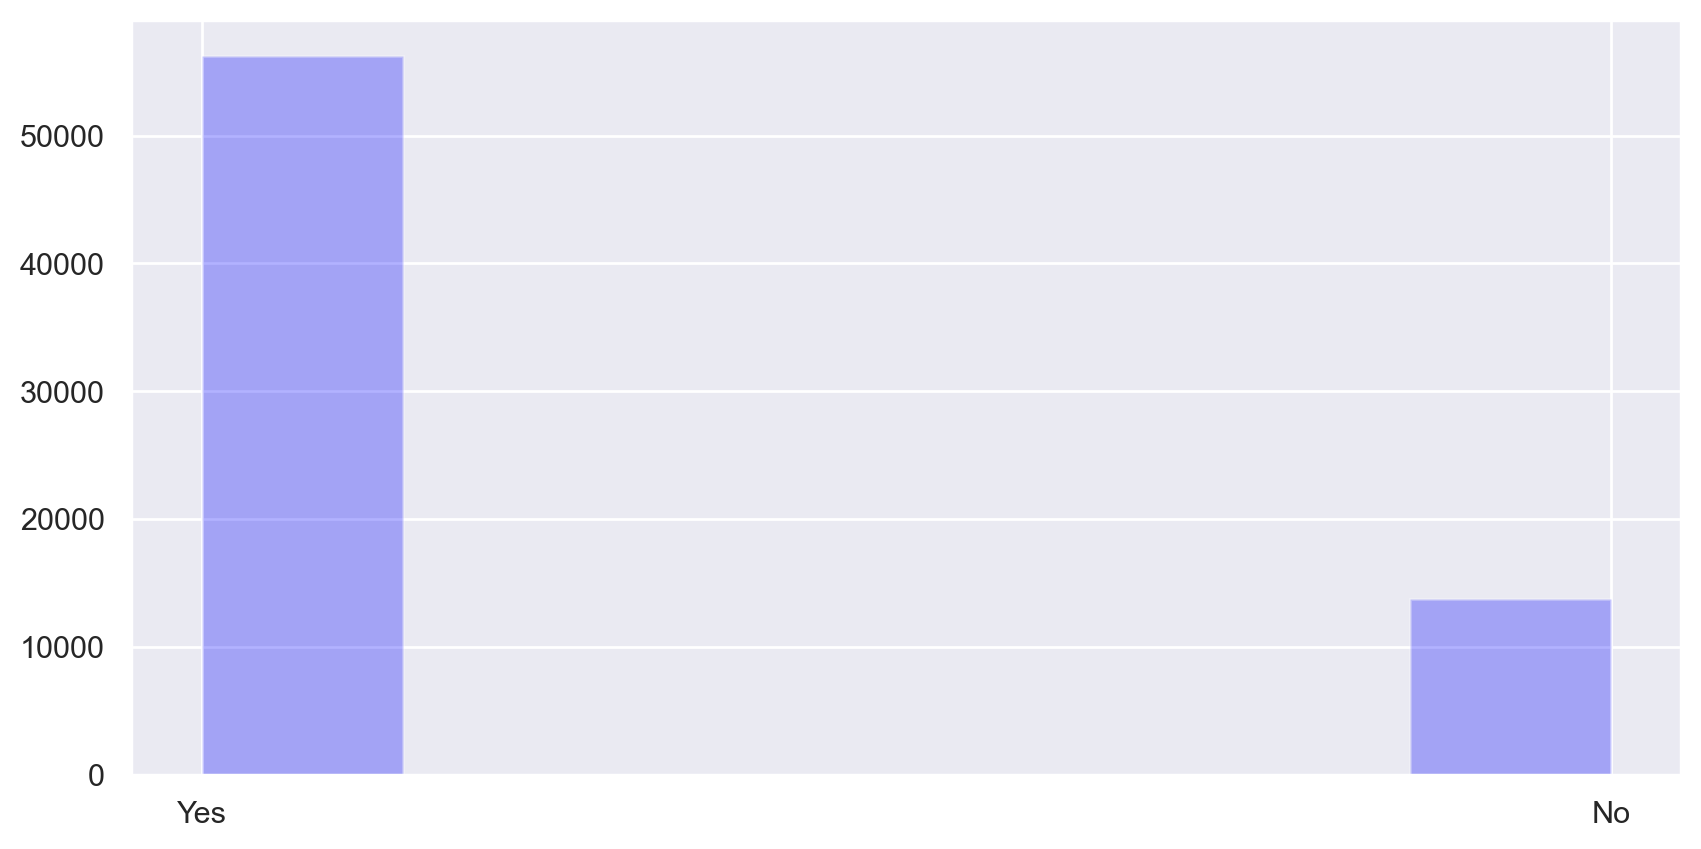

In [231]:
sns.set(style='darkgrid')
plt.figure(figsize=(10,5), dpi = 200)
plt.hist(
   df['active'],
   alpha = 0.3,
   color = 'blue',
   bins = 7
)
plt.show()

Show the distribution of presence or absence of cardiovascular disease.

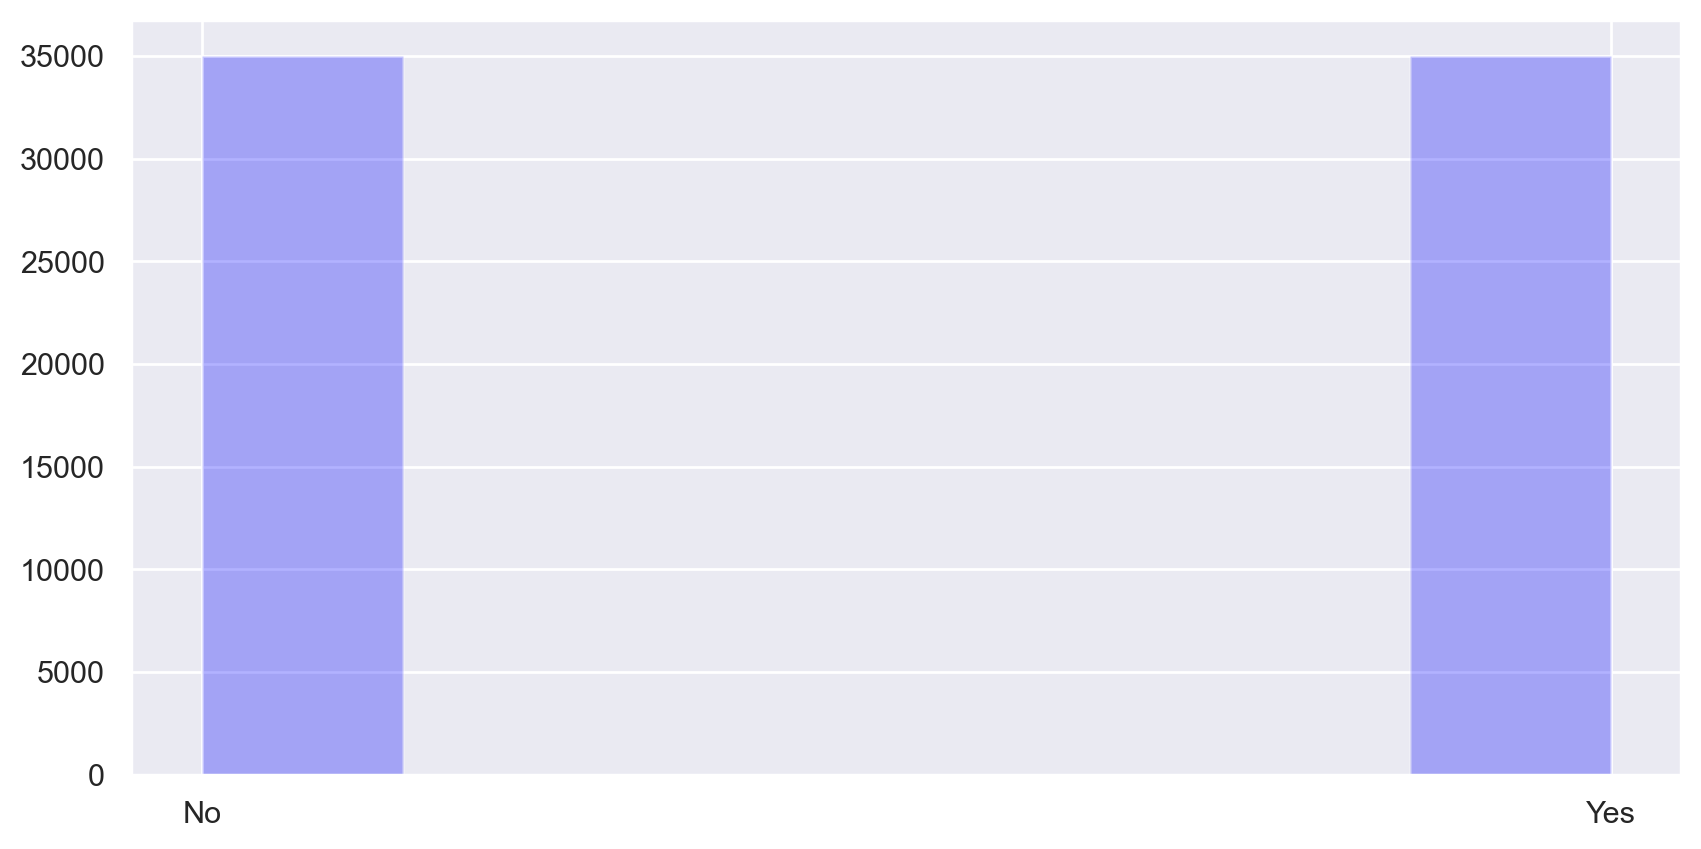

In [264]:
df['cardio'] = df['cardio'].replace({0: 'No', 1: 'Yes'})
sns.set(style='darkgrid')
plt.figure(figsize=(10,5), dpi = 200)
plt.hist(
   df['cardio'],
   alpha = 0.3,
   color = 'blue',
   bins = 7
)
plt.show()

Construct a grid of scatterplots between the systolic and the diastolic blood pressure measurement.
Stratify the plots by gender (row) and by presence or absence of cardiovascular disease (columns).
There is no clear difference between the plots.

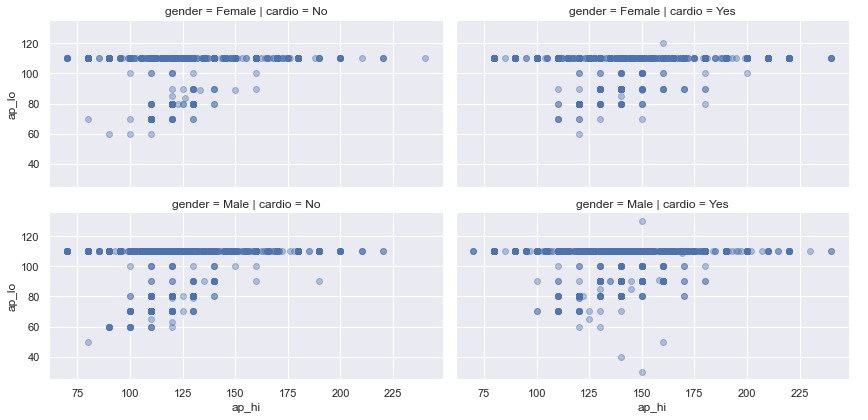

In [265]:
sns.FacetGrid(df, row='gender',  col='cardio', height = 3, aspect = 2).map(
    plt.scatter, 'ap_hi', 'ap_lo', alpha=0.4).add_legend()

Show the correlation between columns.

In [266]:
df.corr()

,id,age,height,weight,ap_hi,ap_lo
id,1.000000,0.003457,-0.003038,-0.001830,0.001840,0.158454
age,0.003457,1.000000,-0.081515,0.053684,0.205082,0.002837
height,-0.003038,-0.081515,1.000000,0.290968,0.016566,0.005575
weight,-0.001830,0.053684,0.290968,1.000000,0.270592,0.005339
ap_hi,0.001840,0.205082,0.016566,0.270592,1.000000,0.017403
ap_lo,0.158454,0.002837,0.005575,0.005339,0.017403,1.000000
